<a href="https://colab.research.google.com/github/cinaral/saymyname/blob/master/week13_bode_plots/week13_bode_plot_of_earthquake_system_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part, we will try to obtain Bode plot for the previous week system which is earthquake simulation of a building.

In order to analyse the systems, sinusoidal input is applied to the system and output is measured. Sin waves are important because any periodic or nonperiodic functions can be represented by sin waves with the help of using Fourier transform so the analyse can be done in frequency domain like in time domain. This is usefull because analysing very complex system in time domain is hard, but looking its frequency responce in frequency domain makes the analysis easier.

A Bode plot is simply a plot of magnitude and phase of a tranfer function as large range of frequencies vary. Moreover, we can guess transfer function for an unknown system. In frequency domain, transfer functions are named as frequency responce functions or sinusoidal transfer functions. They can be represented in terms of their magnitude and phase or their real and imaginary parts. Bode plot is in logarithmic scale so we can simply sum them to see the effect of over all system.

Let us assume a building with 2 floors.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/images.png)

Force acts on M1 only like an earthquake.

In order to draw its bode plot, we need its transfer function. However, the system is a multi degree of freedom system so we actually need its transfer matrix. We apply Laplace Transform to equation of motion in matrix form.

\begin{align}
M\ddot{x} + C\dot{x} + Kx = f \\
\end{align}

After Laplace Transform;

\begin{align}
X = HF
\end{align}

Total responce is sum of responces to individual forces at each frequency.

\begin{align}
X_1 = H_{11}F_1 + H_{12}F_2\\
X_2 = H_{21}F_1 + H_{22}F_2\\
\end{align}

but F2 is zero so;

\begin{align}
X_1 = H_{11}F_1\\
X_2 = H_{21}F_1
\end{align}

We need to find elements of H matrix ,and for this example we will have two bode plots due to H11 and H21.

# Let us install and import necessary libraries

In [2]:
!pip install control

from scipy.integrate import odeint
import scipy.integrate as integrate
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

import numpy as np
from math import sin
from scipy.linalg import eigh
from numpy.linalg import inv
from matplotlib import pyplot as plt

import matplotlib
import ipywidgets
import plotly
import numpy as np
import math
import os
from IPython import *
import scipy

from sympy import symbols
from sympy import simplify
from sympy.abc import s, t, a
from sympy.integrals import *
from sympy.plotting import *
from control import *
from control.matlab import *
from sympy import Heaviside
from sympy.matrices import*
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False)

     |████████████████████████████████| 256kB 2.7MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=04c78a25192472027c0ebf723186425709218c23515303dffad0b63f9c669fb4
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


# Let us define the transfer function of the system

In [5]:
m = 1.0
k = 1000.0
c = 0.5

M = Matrix([[m,0],
             [0,m]])

K = Matrix([[2*k,-k],
             [-k,k]])

C = (c/k)*K

H = (s**2)*M + s*C + K
H_inv = H.inv('ADJ')
H_inv

[                              2                                                                                                                       ]
[                         1.0*s  + 0.5*s + 1000.0                                                          0.5*s + 1000.0                              ]
[--------------------------------------------------------------------------  --------------------------------------------------------------------------]
[                   2   /     2                 \ /     2                 \                     2   /     2                 \ /     2                 \]
[- (-0.5*s - 1000.0)  + \1.0*s  + 0.5*s + 1000.0/*\1.0*s  + 1.0*s + 2000.0/  - (-0.5*s - 1000.0)  + \1.0*s  + 0.5*s + 1000.0/*\1.0*s  + 1.0*s + 2000.0/]
[                                                                                                                                                      ]
[                                                                                 

H11 is;

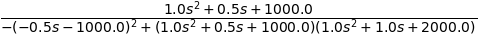

In [7]:
H_inv[0,0]

H21 is

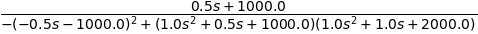

In [8]:
H_inv[1,0]

Now, we can draw their bode plots.

Bode plot of H11


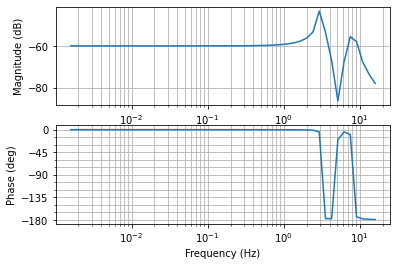

In [9]:
numHinv11 = [1.0, 0.5, 1000.0]
denHinv11 = [1.0, 1.5, 3000.5-0.25, 2000.0-1000.0, 2*10**6 - 1*10**6]
Hinv11 = tf(numHinv11, denHinv11)

# Bode plot for the system
print('Bode plot of H11')
plt.figure(1)
mag, phase, om = bode(Hinv11, logspace(-2, 2), Plot=True)
plt.show(block=False)

Bode plot of H21


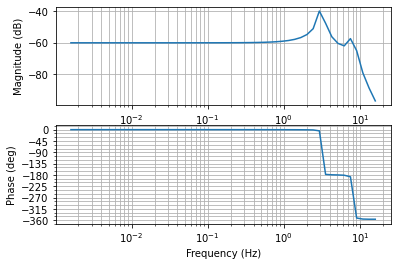

In [10]:
numHinv21 = [0.5, 1000.0]
denHinv21 = [1.0, 1.5, 3000.5-0.25, 2000.0-1000.0, 2*10**6 - 1*10**6]
Hinv21 = tf(numHinv21, denHinv21)

# Bode plot for the system
print('Bode plot of H21')
plt.figure(1)
mag, phase, om = bode(Hinv21, logspace(-2, 2), Plot=True)
plt.show(block=False)

Bode plot of H


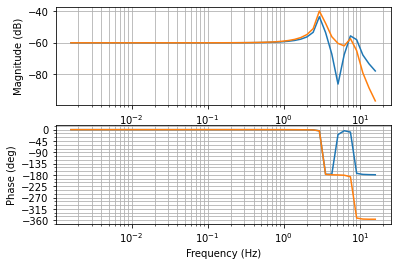

In [13]:
# Bode plot for the system
print('Bode plot of H')
plt.figure(1)
mag, phase, om = bode(Hinv11, logspace(-2, 2), Plot=True)
mag, phase, om = bode(Hinv21, logspace(-2, 2), Plot=True)
plt.show(block=False)

Notes about these frequency responce functions.

Low frequency response corresponds to static response. Resonant frequencies (up peak points) are the same for all frequency responce functions. Anti-resonant frequencies(down peak points) (zeros) only occur in driving point of
frequency responce functions (for which input and output are the same). 

Phase recovers after a resonance in driving point frequency responce function but is
lost through both resonant frequencies in cross point frequency responce functions. 